In [1]:
#Importing the required packages
import numpy as np
import pandas
import random
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from scipy import optimize as op
import scipy.io as lm

In [2]:
# Loading the 5000 training data
#Every row is 20 by 20 grid of pixels which is “unrolled” into a 400-dimensional vector
data = lm.loadmat('ex3data1.mat')
x = np.copy(data['X'])
y = np.copy(data['y'])
ten = y == 10
y[ten] = 0

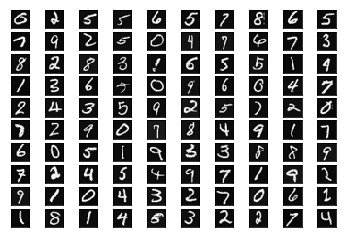

In [3]:
pixels = x.reshape((5000,20, 20))
#plt.title('Label is {label}'.format(label=label))
random.seed(9001)
my_randoms = random.sample(xrange(5000), 100)
for i in range(1,11) :
    for j in range(1,11):
        plt.subplot(10,10,(i-1)*10+j)
        index = my_randoms[(i-1)*10+(j-1)]
        plt.imshow(pixels[index].T,cmap='gray')
        plt.xticks([])
        plt.yticks([])

In [4]:
# Cost and Grad Functions from the Logistic Regression assignment
def costfn (theta,x,label,lam):
    m = np.array(x.shape)[0]*1.0
    z = theta[0]+ np.matmul(x,theta[1:])
    h = sigmoid(z)
    # Cost function without the regularization term
    cost = -1.0/m * sum(label*np.log(h)+(1-label)*np.log(1-h))
    # Cost function with the regularization term
    cost_regularized = cost + lam/(2*m) * sum (theta[1:]**2)
    return cost_regularized
def grad(theta,x,label,lam):
    m = np.array(x.shape)[0]*1.0
    z = theta[0]+ np.matmul(x,theta[1:])
    h = sigmoid(z)
    grad = np.zeros(np.array(x.shape)[1]+1)
    grad[0] = sum(h-label)/m
    grad[1:] = np.matmul((h-label).transpose(),x)/m+ lam/m * theta[1:]
    return grad  
#Sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Multiclass Logistic Regression 

In [5]:
def oneVSall(x,y,lam):
    k = len(np.unique(y))
    theta_k = np.zeros((k,401))
    L = np.copy(y)
    for i in range(0,k):
        index = (y == i)
        L[index] = 1
        L[~index] = 0
        label = L[:,0]
        res = op.minimize(costfn, np.zeros(401), args=(x, label,lam), 
                          method=None, jac=grad, options={'maxiter':3000})
        theta_k[i] = res.x
    return theta_k
        

In [6]:
theta = oneVSall(x,y,0.1)
# Adding the column of ones to the data matrix 
x_inter = np.c_[np.ones((x.shape[0],1)), x]

In [7]:
#Prediction
p = sigmoid(np.matmul(x_inter,theta.T))
eq = p.argmax(1) ==  y[:,0]
print "The model accuracy for training set is",(sum(eq)/50.0)

The model accuracy for training set is 96.48


# Neural Network Forward Propagation

In [8]:
fpw = lm.loadmat('ex3weights.mat')
def NN_pred(x,fpw,label):
    t1 = fpw["Theta1"]
    t2 = fpw["Theta2"]
    x_in = np.c_[np.ones((x.shape[0],1)), x]
    L2 = sigmoid(np.matmul(t1,x_in.T).T)
    L2_in = np.c_[np.ones((L2.shape[0],1)), L2]
    p = sigmoid(np.matmul(t2,L2_in.T).T)
    prediction = p.argmax(1)+1
    ac = sum(prediction == label)/50.0
    return ac

In [9]:
print "The model accuracy for training set is",NN_pred(x,fpw,data['y'][:,0])

The model accuracy for training set is 97.52
